In [65]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import skew, kurtosis
"""
This script performs exploratory data analysis (EDA) on the online retail dataset. 
It includes steps for loading data, calculating basic statistics, and analyzing correlations.
"""

# Load the dataset
data = pd.read_csv('C:\\DATA SCIENCE\\Applied Data Science 1\\clustering and fitting\\online_retail.csv' )

# Convert InvoiceDate to datetime for further analysis (if needed)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')

# Add a new column for Total Sales (Quantity * UnitPrice)
data['TotalSales'] = data['Quantity'] * data['UnitPrice']

# Numeric columns for analysis
numeric_columns = ['Quantity', 'UnitPrice', 'TotalSales']

# Basic statistics
print("Basic Statistics:")
basic_stats = data[numeric_columns].describe().T
basic_stats['Skewness'] = data[numeric_columns].skew()
basic_stats['Kurtosis'] = data[numeric_columns].apply(kurtosis)
print(basic_stats)

# Correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix = data[numeric_columns].corr()
print(correlation_matrix)




Basic Statistics:
               count       mean         std        min   25%   50%    75%  \
Quantity    541909.0   9.552250  218.081158  -80995.00  1.00  3.00  10.00   
UnitPrice   541909.0   4.611114   96.759853  -11062.06  1.25  2.08   4.13   
TotalSales  541909.0  17.987795  378.810824 -168469.60  3.40  9.75  17.40   

                 max    Skewness       Kurtosis  
Quantity     80995.0   -0.264076  119768.054955  
UnitPrice    38970.0  186.506972   59005.174663  
TotalSales  168469.6   -0.964389  151196.601378  

Correlation Matrix:
            Quantity  UnitPrice  TotalSales
Quantity    1.000000  -0.001235    0.886681
UnitPrice  -0.001235   1.000000   -0.162029
TotalSales  0.886681  -0.162029    1.000000


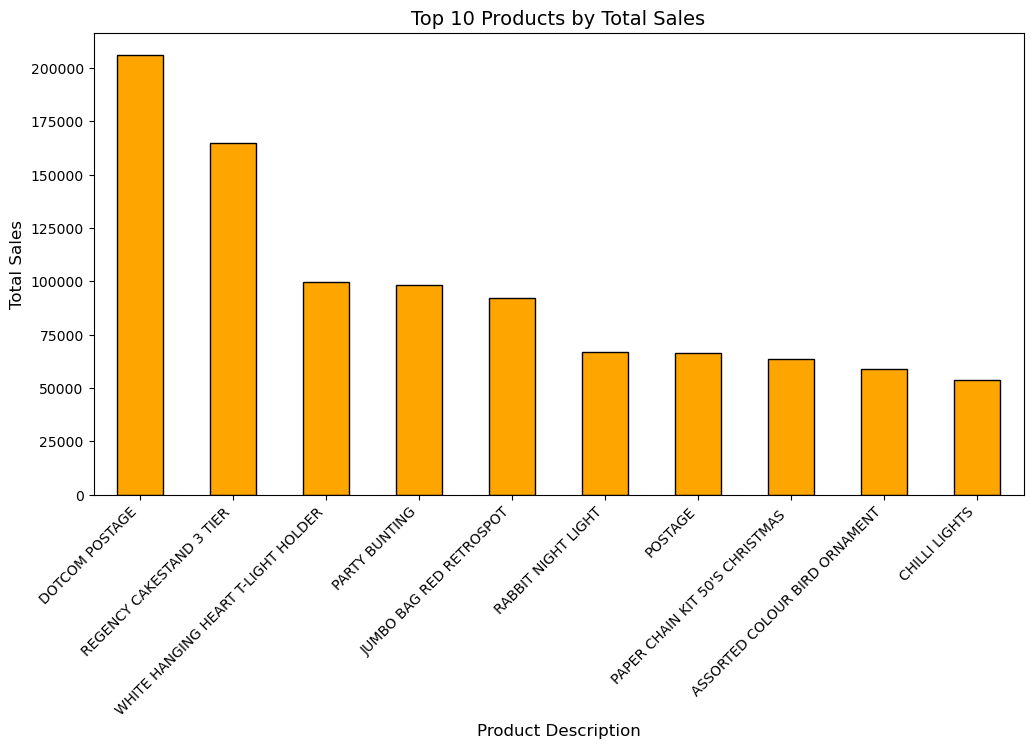

In [66]:
# Aggregate total sales by product description
top_products = data.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)

# Bar chart for top-selling products
def plot_bar_chart(data):
    """
    Plot a bar chart for the top products by total sales.
    """
    plt.figure(figsize=(12, 6))
    top_products.plot(kind='bar', color='orange', edgecolor='black')
    plt.title("Top 10 Products by Total Sales", fontsize=14)
    plt.xlabel("Product Description", fontsize=12)
    plt.ylabel("Total Sales", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.show()

plot_bar_chart(top_products)  # Bar chart for top products


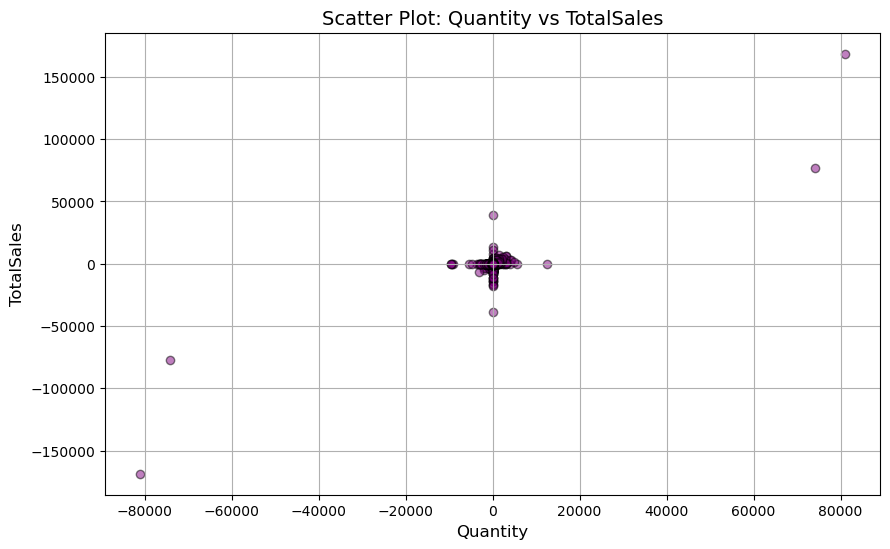

In [67]:
# 2. Scatter Plot: Relationship between Quantity and TotalSales
def plot_scatter(x_column, y_column):
    """
    Plot a scatter plot between two numeric columns.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x_column], data[y_column], alpha=0.5, color='purple', edgecolor='black')
    plt.title(f"Scatter Plot: {x_column} vs {y_column}", fontsize=14)
    plt.xlabel(x_column, fontsize=12)
    plt.ylabel(y_column, fontsize=12)
    plt.grid(True)
    plt.show()

plot_scatter('Quantity', 'TotalSales')  # Scatter plot for Quantity vs Total Sales


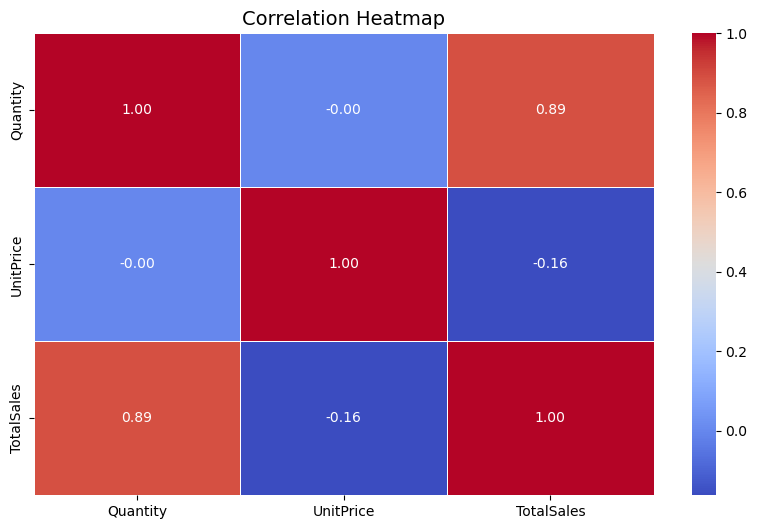

In [68]:
# 3. Heatmap: Correlation matrix of numeric columns
def plot_heatmap():
    """
    Plot a heatmap for the correlation matrix of numeric columns.
    """
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap", fontsize=14)
    plt.show()

plot_heatmap()  # Heatmap for correlation matrix


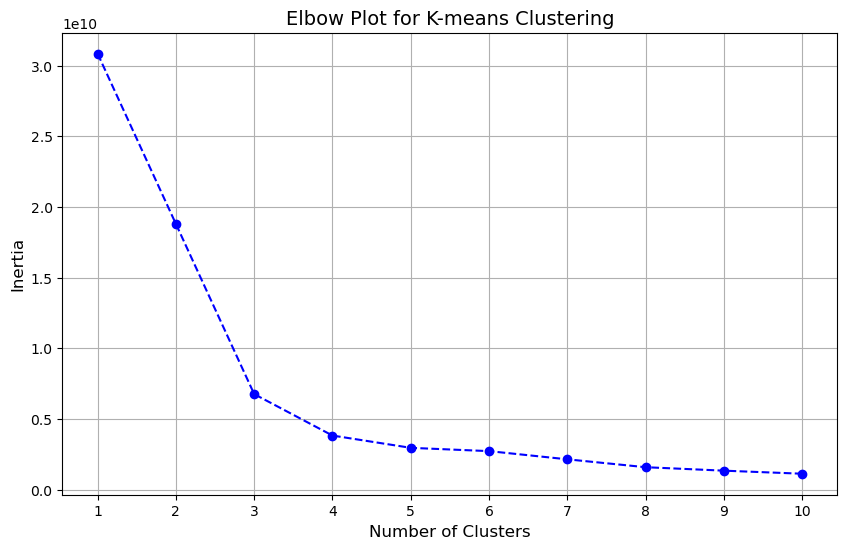

In [69]:
# 4. Elbow Plot: Determine optimal number of clusters for K-means
def plot_elbow(data, max_clusters=10):
    """
    Plot the elbow curve for K-means clustering.
    """
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), inertias, marker='o', linestyle='--', color='b')
    plt.title("Elbow Plot for K-means Clustering", fontsize=14)
    plt.xlabel("Number of Clusters", fontsize=12)
    plt.ylabel("Inertia", fontsize=12)
    plt.xticks(range(1, max_clusters + 1))
    plt.grid(True)
    plt.show()

# Prepare data for clustering: Only use numeric columns
clustering_data = data[['Quantity', 'UnitPrice']].dropna()
plot_elbow(clustering_data)  # Elbow plot for clustering


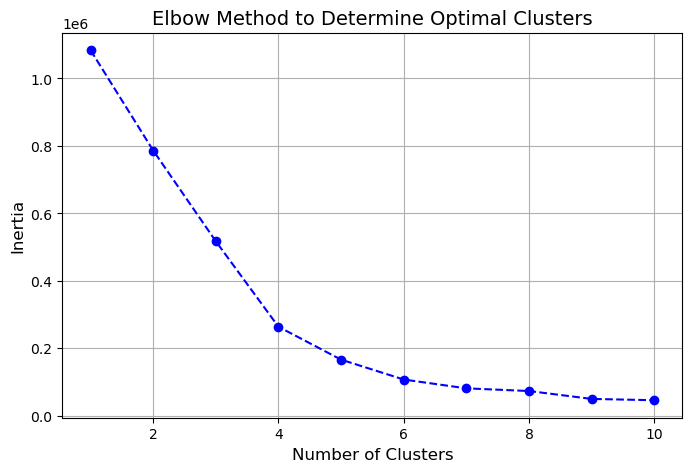

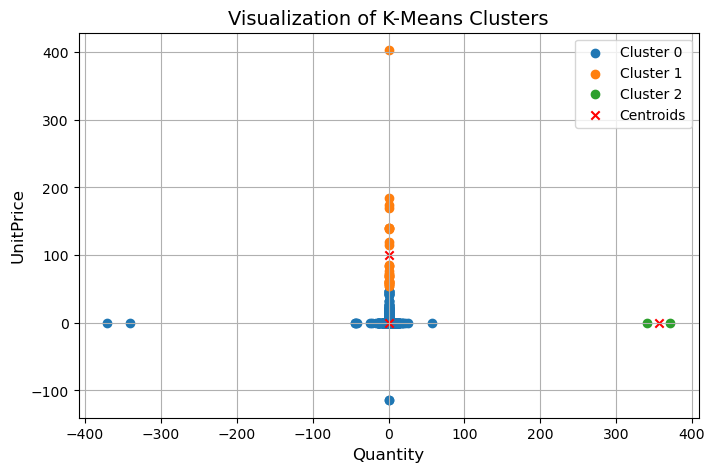

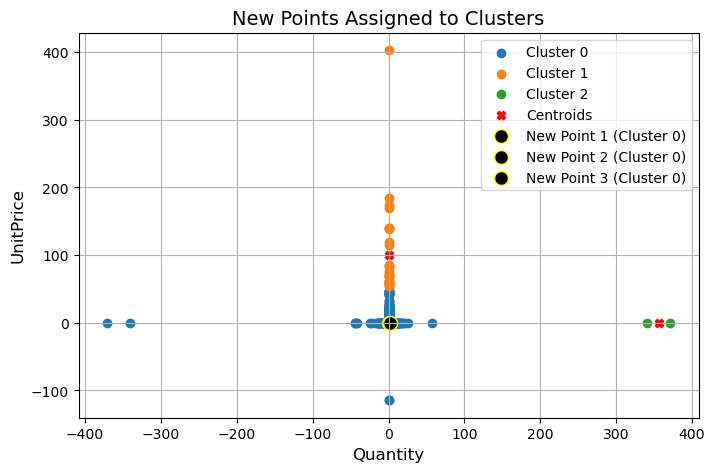

Predicted clusters for new points: [0 0 0]


In [70]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Function for clustering with K-Means and Elbow Plot
def perform_kmeans_clustering(dataset, features, max_clusters=10):
    """
    Perform K-Means clustering with an elbow plot to determine the optimal number of clusters.
    """
    # Standardize the data for clustering
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(dataset[features])

    # Compute inertia for different cluster sizes
    inertia_values = []
    for cluster_count in range(1, max_clusters + 1):
        kmeans_model = KMeans(n_clusters=cluster_count, random_state=42)
        kmeans_model.fit(standardized_data)
        inertia_values.append(kmeans_model.inertia_)

    # Generate Elbow Plot
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), inertia_values, marker='o', linestyle='--', color='blue')
    plt.title("Elbow Method to Determine Optimal Clusters", fontsize=14)
    plt.xlabel("Number of Clusters", fontsize=12)
    plt.ylabel("Inertia", fontsize=12)
    plt.grid()
    plt.show()

    # Apply K-Means clustering using an optimal number of clusters
    optimal_clusters = 3
    kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=42)
    cluster_labels = kmeans_model.fit_predict(standardized_data)

    # Assign cluster labels to the dataset
    dataset['Cluster'] = cluster_labels
    warnings.filterwarnings("ignore", message="X does not have valid feature names")

    # Plot the clusters
    plt.figure(figsize=(8, 5))
    for cluster in range(optimal_clusters):
        cluster_points = standardized_data[cluster_labels == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
    plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1],
                color='red', marker='x', label='Centroids')
    plt.title("Visualization of K-Means Clusters", fontsize=14)
    plt.xlabel(features[0], fontsize=12)
    plt.ylabel(features[1], fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()

    return kmeans_model, scaler

# Predict clusters for new points and visualize them
def visualize_predictions(kmeans_model, scaler, dataset, features, new_points):
    """
    Predict and visualize new data points on existing clusters.
    """
    standardized_data = scaler.transform(dataset[features])
    standardized_new_points = scaler.transform(new_points)

    # Predict cluster labels for new points
    predicted_labels = kmeans_model.predict(standardized_new_points)

    # Plot existing clusters
    plt.figure(figsize=(8, 5))
    for cluster in range(kmeans_model.n_clusters):
        cluster_points = standardized_data[dataset['Cluster'] == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
    plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1],
                color='red', marker='X', label='Centroids')

    # Plot new points with their predicted clusters
    for i, point in enumerate(standardized_new_points):
        plt.scatter(point[0], point[1], color='black', edgecolor='yellow', marker='o',
                    s=100, label=f'New Point {i+1} (Cluster {predicted_labels[i]})')

    plt.title("New Points Assigned to Clusters", fontsize=14)
    plt.xlabel(features[0], fontsize=12)
    plt.ylabel(features[1], fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()

    return predicted_labels

# Perform clustering on 'Quantity' and 'UnitPrice'
kmeans_model, scaler = perform_kmeans_clustering(data, ['Quantity', 'UnitPrice'])

# Define new points for prediction
new_points = np.array([[10, 2], [500, 20], [300, 1]])

# Visualize predictions for new points
predicted_labels = visualize_predictions(kmeans_model, scaler, data, ['Quantity', 'UnitPrice'], new_points)
print("Predicted clusters for new points:", predicted_labels)


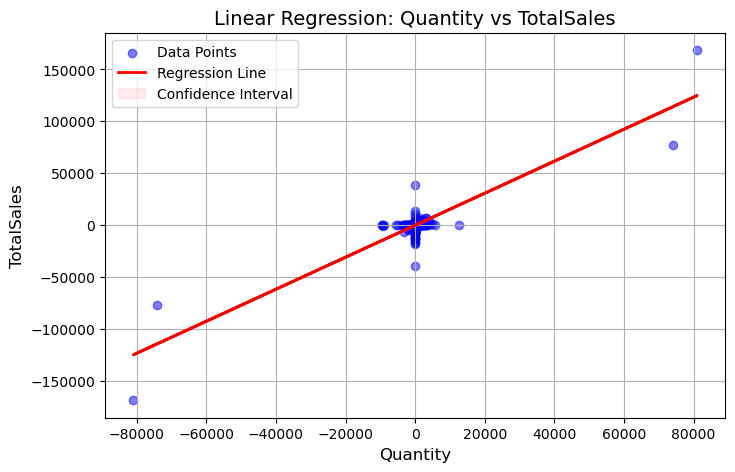

Predicted TotalSales for given quantities: [  18.67741149  157.29367613 1543.45632257]


In [71]:
from sklearn.linear_model import LinearRegression

# Function for linear regression with confidence intervals
def linear_regression_with_plot(dataset, x_feature, y_feature):
    """
    Performs linear regression and visualizes the results with confidence intervals.
    """
    # Extract features and target variable
    x_values = dataset[x_feature].values.reshape(-1, 1)
    y_values = dataset[y_feature].values

    # Train the linear regression model
    regressor = LinearRegression()
    regressor.fit(x_values, y_values)
    y_predictions = regressor.predict(x_values)

    # Calculate confidence intervals
    residual_errors = y_values - y_predictions
    residual_std = np.std(residual_errors)
    conf_interval = 1.96 * residual_std

    # Plot original data, regression line, and confidence interval
    plt.figure(figsize=(8, 5))
    plt.scatter(x_values, y_values, color='blue', alpha=0.5, label='Data Points')
    plt.plot(x_values, y_predictions, color='red', linewidth=2, label='Regression Line')
    plt.fill_between(
        x_values.flatten(),
        y_predictions - conf_interval,
        y_predictions + conf_interval,
        color='pink',
        alpha=0.3,
        label='Confidence Interval'
    )
    plt.title(f"Linear Regression: {x_feature} vs {y_feature}", fontsize=14)
    plt.xlabel(x_feature, fontsize=12)
    plt.ylabel(y_feature, fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()

    return regressor

# Perform regression on 'Quantity' and 'TotalSales'
regressor_model = linear_regression_with_plot(data, 'Quantity', 'TotalSales')

# Predict values for new data
def predict_with_regression(model, new_inputs):
    """
    Predicts target values for given input features using the trained regression model.
    """
    predictions = model.predict(new_inputs.reshape(-1, 1))
    return predictions

# Example predictions for new quantities
new_quantities = np.array([10, 100, 1000])
predicted_sales = predict_with_regression(regressor_model, new_quantities)
print("Predicted TotalSales for given quantities:", predicted_sales)
